In [1]:
#json 파일 합치기
import json
data1 = json.load(open('instagram_data_hwa_2gate.json', 'rb'))
data2 = json.load(open('instagram_data_hwa_4gate.json', 'rb'))
insta_dict = {'id':[],
              'location': [],
              'date': [],
              'like': [],
              'text': [],
              'hashtag': [],
              'img': []}

for i in insta_dict.keys():
    insta_dict[i] = data1[i] + data2[i]
    
with open('instagram_data_hwa_2-4gate.json', 'w') as f:
    json.dump(insta_dict, f, indent=4)

In [2]:
import json
from tqdm import tqdm
#Load in cookie
cookies = json.load(open('instagram_data_hwa_2-4gate.json', 'rb'))
#날짜 데이터 불러오기
dates = cookies["date"]

# 시간만 가져오기
hour_l = []
for i in tqdm(range(len(dates))):
    hour_l.append(dates[i][-8:-6])
    
print(hour_l)

100%|█████████████████████████████████████████████████████████████████████████| 4490/4490 [00:00<00:00, 1500233.01it/s]

['12', '22', '01', '07', '05', '07', '10', '13', '00', '12', '12', '08', '02', '11', '11', '10', '06', '06', '09', '14', '12', '01', '16', '12', '09', '09', '05', '13', '12', '02', '11', '09', '06', '06', '15', '15', '09', '12', '10', '09', '02', '02', '11', '00', '06', '10', '00', '15', '15', '14', '05', '02', '10', '06', '07', '02', '08', '01', '09', '08', '05', '06', '06', '01', '07', '01', '12', '05', '00', '17', '07', '03', '02', '05', '03', '11', '05', '10', '13', '11', '04', '13', '09', '10', '00', '04', '13', '12', '04', '08', '08', '12', '11', '04', '15', '09', '11', '10', '04', '13', '03', '03', '05', '05', '05', '13', '13', '06', '08', '03', '15', '15', '15', '12', '11', '10', '09', '14', '13', '15', '14', '01', '04', '04', '04', '05', '09', '05', '14', '07', '20', '16', '15', '09', '03', '03', '00', '01', '01', '01', '12', '01', '16', '16', '14', '13', '12', '11', '11', '11', '11', '11', '10', '09', '15', '10', '08', '13', '06', '01', '13', '10', '10', '23', '23', '11', '10

In [5]:
from collections import Counter
#시간별 카운팅

count_hours = Counter(hour_l)
print(count_hours)
sum(list(count_hours.values()))

Counter({'13': 356, '10': 316, '11': 313, '12': 304, '14': 292, '09': 286, '08': 282, '03': 244, '05': 229, '06': 229, '04': 226, '07': 225, '15': 216, '23': 166, '02': 156, '00': 141, '01': 136, '16': 134, '17': 74, '22': 46, '18': 38, '21': 33, '19': 29, '20': 19})


4490

In [7]:
# 2시간 주기
hours = count_hours.keys()
count_2hour = {}
for i in range(0, 23, 2):
    total = []
    for j in range(i, i+2):
        if j < 10:
            hour = count_hours["0{}" .format(j)]
            total.append(hour)
        else:
            hour = count_hours["{}" .format(j)]
            total.append(hour)

    count_2hour["{}-{}" .format(i, i+2)] = sum(total)
                                
print(count_2hour)
sum(list(count_2hour.values()))

{'0-2': 277, '2-4': 400, '4-6': 455, '6-8': 454, '8-10': 568, '10-12': 629, '12-14': 660, '14-16': 508, '16-18': 208, '18-20': 67, '20-22': 52, '22-24': 212}


4490

In [8]:
# 6시간 주기
hours = count_hours.keys()
count_6hour = {}
for i in range(0, 23, 6):
    total = []
    for j in range(i, i+6):
        if j < 10:
            hour = count_hours["0{}" .format(j)]
            total.append(hour)
        else:
            hour = count_hours["{}" .format(j)]
            total.append(hour)
            
    count_6hour["{}-{}" .format(i, i+6)] = sum(total)


sum(list(count_6hour.values()))

4490

In [9]:
# 4시간 주기
hours = count_hours.keys()
count_4hour = {}
for i in range(0, 23, 4):
    total = []
    for j in range(i, i+4):
        if j < 10:
            hour = count_hours["0{}" .format(j)]
            total.append(hour)
        else:
            hour = count_hours["{}" .format(j)]
            total.append(hour)

    count_4hour["{}-{}" .format(i, i+4)] = sum(total)
        

print(count_4hour)
sum(list(count_4hour.values()))

{'0-4': 677, '4-8': 909, '8-12': 1197, '12-16': 1168, '16-20': 275, '20-24': 264}


4490

In [10]:
#한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc

matplotlib.rcParams['font.family'] = 'SB_AGGRO_M'
print(matplotlib.rcParams['font.family'])

['SB_AGGRO_M']


findfont: Font family ['SB_AGGRO_M'] not found. Falling back to DejaVu Sans.


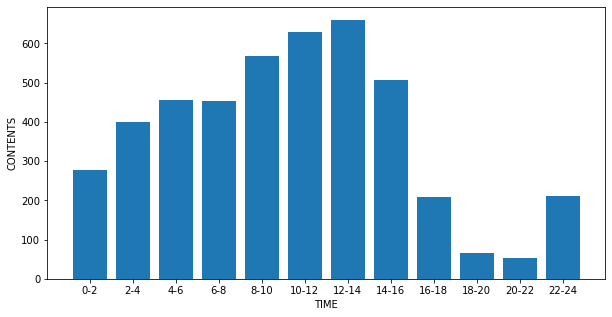

In [11]:
import matplotlib.pyplot as plt
#년 게시물 빈도수 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('TIME')
plt.ylabel('CONTENTS')

# x,y축 데이터
x_label = count_2hour.keys()
y_label = count_2hour.values()

plt.bar(x_label, y_label)

plt.show()

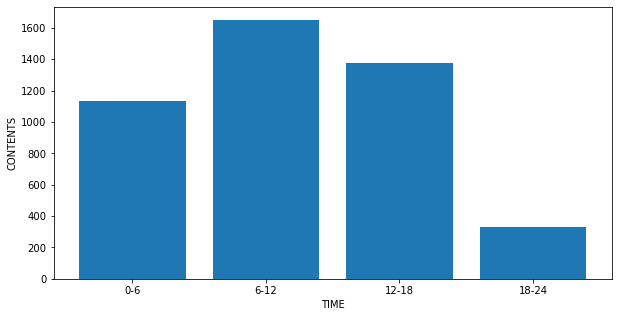

In [12]:
import matplotlib.pyplot as plt
#년 게시물 빈도수 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('TIME')
plt.ylabel('CONTENTS')

# x,y축 데이터
x_label = count_6hour.keys()
y_label = count_6hour.values()

plt.bar(x_label, y_label)

plt.show()

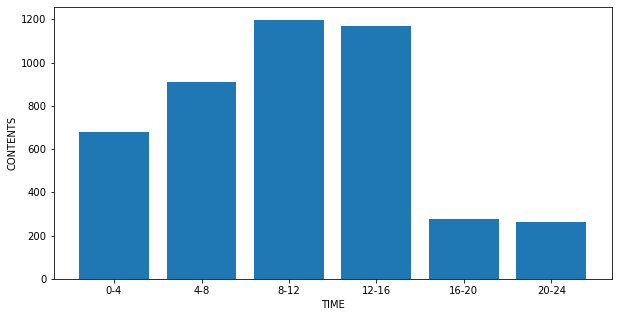

In [13]:
import matplotlib.pyplot as plt
#년 게시물 빈도수 그래프 그리기
#그래프 사이즈 지정
plt.figure(figsize=(10, 5))
#x,y축 네이밍
plt.xlabel('TIME')
plt.ylabel('CONTENTS')

# x,y축 데이터
x_label = count_4hour.keys()
y_label = count_4hour.values()

plt.bar(x_label, y_label)

plt.show()